In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from utils.date import convert_to_str_days, convert_days_to_str
from utils.dataloader import load_indirect_WUE, load_carbon, load_direct_WUE


In [4]:
def vis_boxplot(totalWue, work_time, ylabel, ylim = None, yticks = None, save_path = None, 
                fill_color =  "tab:green"):
    num_ins   = totalWue.shape[0]

    work_load_array = np.zeros([num_ins - work_time + 1, work_time])
    for i in range(work_time):
        work_load_array[:,i] = totalWue[i:num_ins - work_time + 1 + i]
    total_load = work_load_array.mean(axis = 1)

    total_load = total_load.reshape([-1,24])
    total_load = np.concatenate([total_load[:,1::2], total_load[:,0::2]])


    high_ball = np.percentile(total_load, 75, 0)
    mid_ball  = np.percentile(total_load, 50, 0)
    low_ball  = np.percentile(total_load, 25, 0)


    fig, ax = plt.subplots(1,figsize =(8, 5)) 

    # Making a plot 
    bp = ax.boxplot(total_load) 


    ax.plot(np.arange(12)+1, mid_ball, color = fill_color, linewidth = 4)
    
    if ylim is not None: plt.ylim(ylim)
    if yticks is not None: plt.yticks(yticks,fontsize = 18,fontweight='bold')

    ax.set_xlabel("Starting Hours")
    ax.set_ylabel("AVG WUE (L/kWh)")

    ax.fill_between(np.arange(12)+1, low_ball, y2=high_ball, alpha = 0.1, color = fill_color)
    # ax.set_xticks(np.arange(13)+0.5, labels = np.arange(13)*2,fontsize = 18,fontweight='bold')

    ax.set_xticks(np.arange(5)*3+0.5, labels = np.arange(5)*6,fontsize = 18,fontweight='bold')
    ax.set_xticks(np.arange(13)+0.5, labels = np.arange(13)*2,fontsize = 18,fontweight='bold', minor=True)

    ax.set_xlabel("Time (PDT)", fontweight ='bold', fontsize=20)
    ax.set_ylabel(ylabel, fontweight ='bold', fontsize=20)

    ax.spines['bottom'].set_linewidth(4);
    ax.spines['left'].set_linewidth(4);
    ax.spines['right'].set_linewidth(4);
    ax.spines['top'].set_linewidth(4);

    # plt.title(start_str + " to  " + end_date_str)
    plt.grid(True,alpha=0.5)
    # display the plot 
    # if save_path is not None: plt.savefig(save_path, bbox_inches='tight')
    plt.show() 

## Feburary

### 3.1 Oregan Datacenter

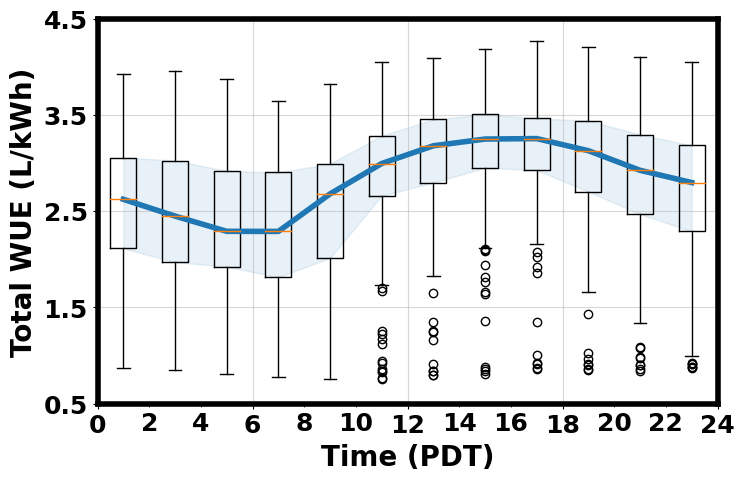

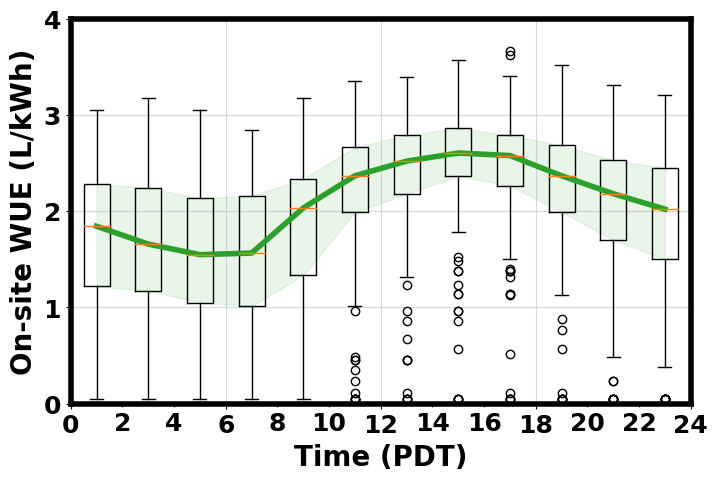

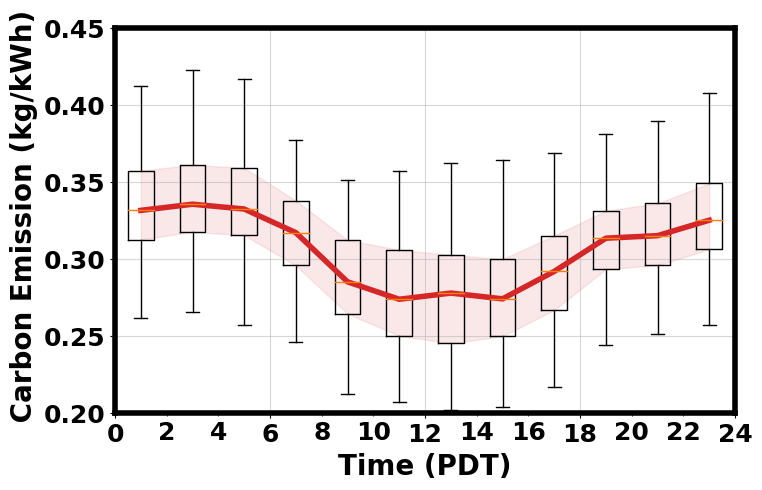

In [5]:
# 4S2_Oregan_NW.csv    HND_Nevada_CAL.csv   JYO_virginia_PJM.csv  JWY_Texas_ERCO.csv

loc_name      = "4S2_Oregan_NW"
fuel_mix_path = "data/fuelmix/{}_year_2022.csv".format(loc_name.split("_")[-1])
weather_path  = "data/weather/{}.csv".format(loc_name)
dc_loc        = loc_name.split("_")[1]


work_time     = 1
start_str     = "2022-02-01T01"
end_date_str  = "2022-04-30T01"
start_ts      = convert_to_str_days(start_str)*24  
end_ts        = convert_to_str_days(end_date_str)*24  + work_time - 1
num_timeslot  = end_ts - start_ts

time_array    = np.arange(1, 1+num_timeslot)/24

# Suppose the datacenter PUE is ~1.2
indirectWue = load_indirect_WUE(fuel_mix_path, dc_loc) * 1.1
indirectWue = np.roll(indirectWue, -7)      # UTC to PDT time
indirectWue = indirectWue[start_ts:end_ts]

carbon_curve = load_carbon(fuel_mix_path, dc_loc)
carbon_curve = np.roll(carbon_curve, -7)    # UTC to PDT time
carbon_curve = carbon_curve[start_ts:end_ts]
 

directWue = load_direct_WUE(weather_path)
directWue = np.roll(directWue, -7)
directWue = directWue[start_ts:end_ts]



vis_boxplot(indirectWue + directWue, work_time, "Total WUE (L/kWh)", fill_color = "tab:blue",
            ylim = [0.5,4.5], yticks = np.arange(0.5,4.51,1), 
            save_path = "output/boxplot_more/{}_total_wue_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

vis_boxplot(directWue, work_time, "On-site WUE (L/kWh)", fill_color = "tab:green",
            ylim = [0,4], yticks = np.arange(0,4.01,1), 
            save_path = "output/boxplot_more/{}_direct_wue_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

vis_boxplot(carbon_curve, work_time, " Carbon Emission (kg/kWh)", 
            ylim = [0.2,0.45],yticks = np.arange(0.2, 0.451, 0.05),fill_color = "tab:red",
            save_path = "output/boxplot_more/{}_cer_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

### 3.2 Texas Datacenter

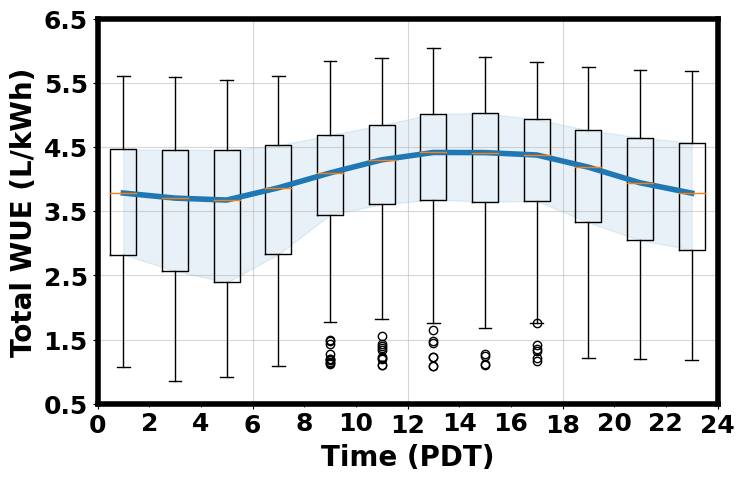

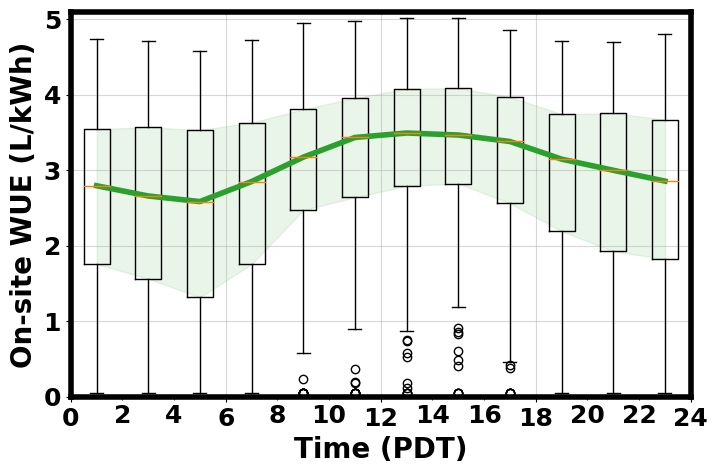

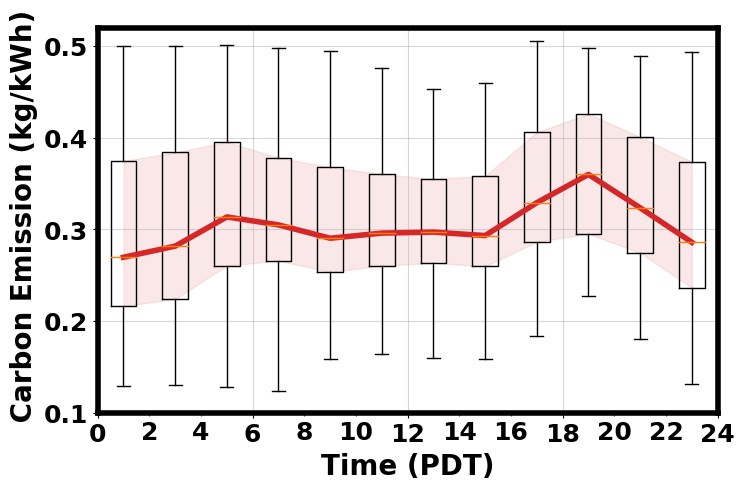

In [6]:
# 4S2_Oregan_NW.csv    HND_Nevada_CAL.csv   JYO_virginia_PJM.csv  JWY_Texas_ERCO.csv


loc_name      = "JWY_Texas_ERCO"
fuel_mix_path = "data/fuelmix/{}_year_2022.csv".format(loc_name.split("_")[-1])
weather_path  = "data/weather/{}.csv".format(loc_name)
dc_loc        = loc_name.split("_")[1]

work_time     = 1
start_str     = "2022-02-01T01"
end_date_str  = "2022-04-30T01"
start_ts      = convert_to_str_days(start_str)*24  
end_ts        = convert_to_str_days(end_date_str)*24  + work_time - 1
num_timeslot  = end_ts - start_ts

time_array    = np.arange(1, 1+num_timeslot)/24

# Suppose the datacenter PUE is ~1.2
indirectWue = load_indirect_WUE(fuel_mix_path, dc_loc) * 1.1
indirectWue = np.roll(indirectWue, -7)      # UTC to PDT time
indirectWue = indirectWue[start_ts:end_ts]

carbon_curve = load_carbon(fuel_mix_path, dc_loc)
carbon_curve = np.roll(carbon_curve, -7)    # UTC to PDT time
carbon_curve = carbon_curve[start_ts:end_ts]
 

directWue = load_direct_WUE(weather_path)
directWue = np.roll(directWue, -7)
directWue = directWue[start_ts:end_ts]



vis_boxplot(indirectWue + directWue, work_time, "Total WUE (L/kWh)", fill_color = "tab:blue",
            ylim = [0.5,6.5], yticks = np.arange(0.5,6.51,1), 
            save_path = "output/boxplot_more/{}_total_wue_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

vis_boxplot(directWue, work_time, "On-site WUE (L/kWh)", fill_color = "tab:green",
            ylim = [0,5.1], yticks = np.arange(0,5.11,1), 
            save_path = "output/boxplot_more/{}_direct_wue_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

vis_boxplot(carbon_curve, work_time, " Carbon Emission (kg/kWh)", 
            ylim = [0.10,0.52],yticks = np.arange(0.10, 0.501, 0.1),fill_color = "tab:red",
            save_path = "output/boxplot_more/{}_cer_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

## August

### 2.1 Nevada

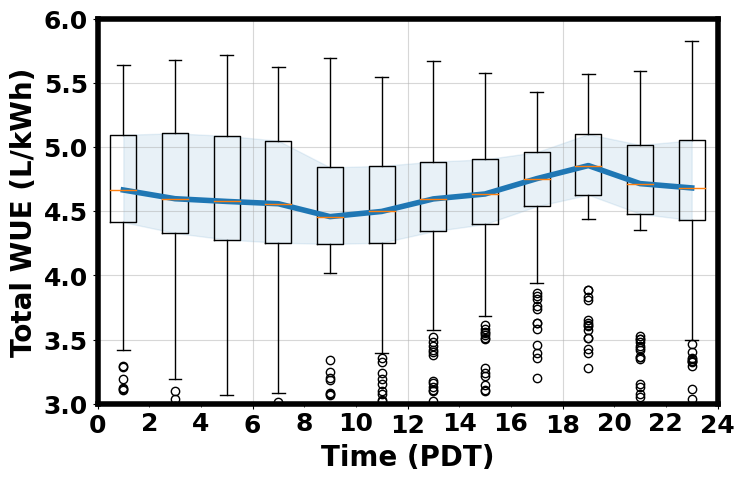

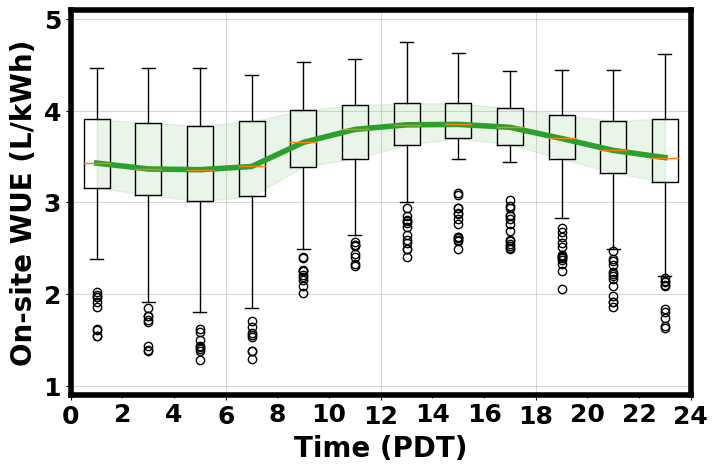

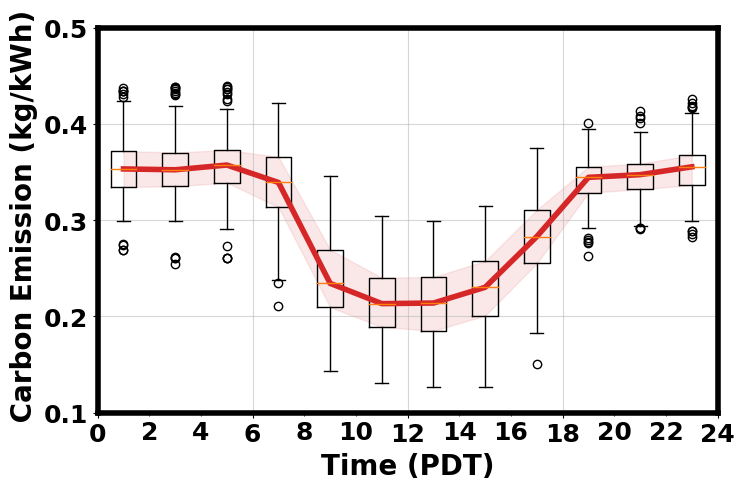

In [7]:
# 4S2_Oregan_NW.csv    HND_Nevada_CAL.csv   JYO_virginia_PJM.csv
# FTY_Georgia_SE.csv   JWY_Texas_ERCO.csv

loc_name      = "HND_Nevada_CAL"
fuel_mix_path = "data/fuelmix/{}_year_2022.csv".format(loc_name.split("_")[-1])
weather_path  = "data/weather/{}.csv".format(loc_name)
dc_loc        = loc_name.split("_")[1]


work_time     = 1
start_str     = "2022-09-01T01"
end_date_str  = "2022-10-30T01"
start_ts      = convert_to_str_days(start_str)*24  
end_ts        = convert_to_str_days(end_date_str)*24  + work_time - 1
num_timeslot  = end_ts - start_ts

time_array    = np.arange(1, 1+num_timeslot)/24

# Suppose the datacenter PUE is ~1.2
indirectWue = load_indirect_WUE(fuel_mix_path, dc_loc) * 1.1
indirectWue = np.roll(indirectWue, -7)      # UTC to PDT time
indirectWue = indirectWue[start_ts:end_ts]

carbon_curve = load_carbon(fuel_mix_path, dc_loc)
carbon_curve = np.roll(carbon_curve, -7)    # UTC to PDT time
carbon_curve = carbon_curve[start_ts:end_ts]
 

directWue = load_direct_WUE(weather_path)
directWue = np.roll(directWue, -7)
directWue = directWue[start_ts:end_ts]


vis_boxplot(indirectWue + directWue, work_time, "Total WUE (L/kWh)",
            ylim = [3,6], yticks = np.arange(3,6.01,0.5), fill_color = "tab:blue",
            save_path = "output/boxplot_more/{}_total_wue_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

vis_boxplot(directWue, work_time, "On-site WUE (L/kWh)",
            ylim = [0.9, 5.1], yticks = np.arange(1,5.6,1), fill_color = "tab:green",
            save_path = "output/boxplot_more/{}_direct_wue_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

vis_boxplot(carbon_curve, work_time, " Carbon Emission (kg/kWh)", 
            ylim = [0.1,0.5],yticks = np.arange(0.1, 0.51, 0.1),fill_color = "tab:red",
            save_path = "output/boxplot_more/{}_cer_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

### 2.2 Virginia

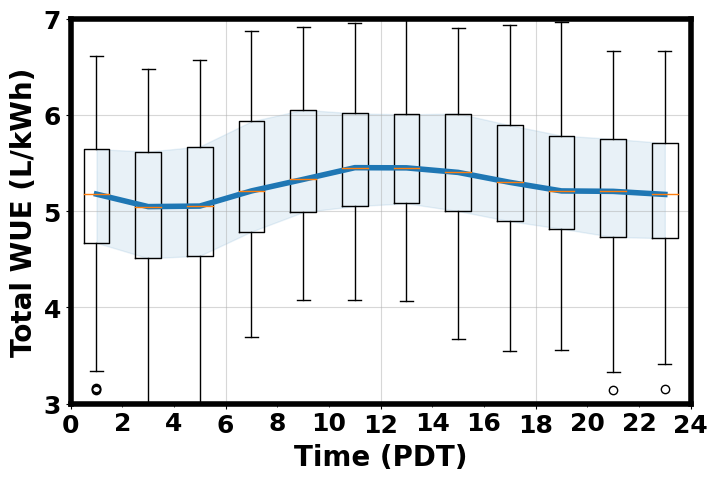

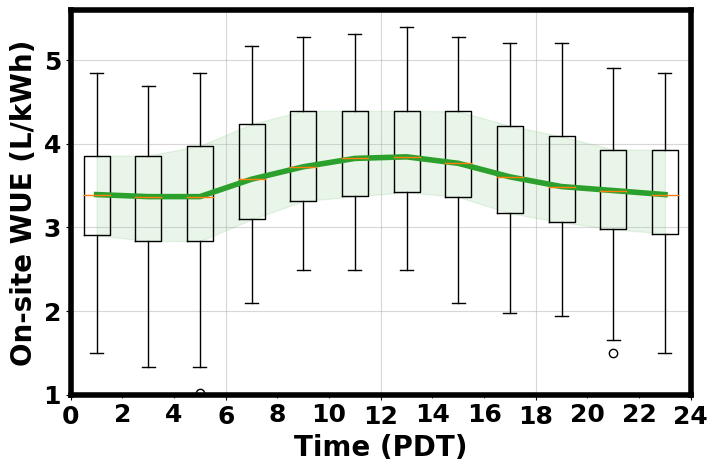

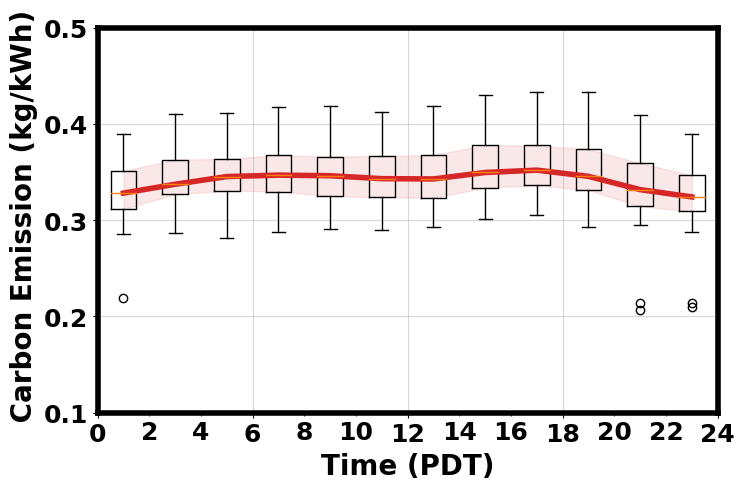

In [8]:
# 4S2_Oregan_NW.csv    HND_Nevada_CAL.csv   JYO_virginia_PJM.csv
# FTY_Georgia_SE.csv   JWY_Texas_ERCO.csv

loc_name      = "JYO_virginia_PJM"
fuel_mix_path = "data/fuelmix/{}_year_2022.csv".format(loc_name.split("_")[-1])
weather_path  = "data/weather/{}.csv".format(loc_name)
dc_loc        = loc_name.split("_")[1]


work_time     = 1
start_str     = "2022-09-01T01"
end_date_str  = "2022-10-30T01"
start_ts      = convert_to_str_days(start_str)*24  
end_ts        = convert_to_str_days(end_date_str)*24  + work_time - 1
num_timeslot  = end_ts - start_ts

time_array    = np.arange(1, 1+num_timeslot)/24

# Suppose the datacenter PUE is ~1.2
indirectWue = load_indirect_WUE(fuel_mix_path, dc_loc) * 1.1
indirectWue = np.roll(indirectWue, -7)      # UTC to PDT time
indirectWue = indirectWue[start_ts:end_ts]

carbon_curve = load_carbon(fuel_mix_path, dc_loc)
carbon_curve = np.roll(carbon_curve, -7)    # UTC to PDT time
carbon_curve = carbon_curve[start_ts:end_ts]
 

directWue = load_direct_WUE(weather_path)
directWue = np.roll(directWue, -7)
directWue = directWue[start_ts:end_ts]



vis_boxplot(indirectWue + directWue, work_time, "Total WUE (L/kWh)", fill_color = "tab:blue",
            ylim = [3,7], yticks = np.arange(3,7.1,1), 
            save_path = "output/boxplot_more/{}_total_wue_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

vis_boxplot(directWue, work_time, "On-site WUE (L/kWh)", fill_color = "tab:green",
            ylim = [1,5.6], yticks = np.arange(1,5.1,1), 
            save_path = "output/boxplot_more/{}_direct_wue_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

vis_boxplot(carbon_curve, work_time, " Carbon Emission (kg/kWh)", 
            ylim = [0.1,0.5],yticks = np.arange(0.1, 0.51, 0.1),fill_color = "tab:red",
            save_path = "output/boxplot_more/{}_cer_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

### 2.3 Texas

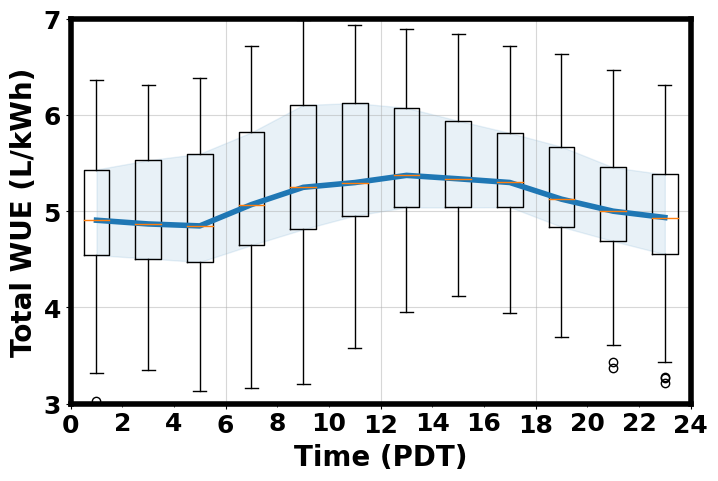

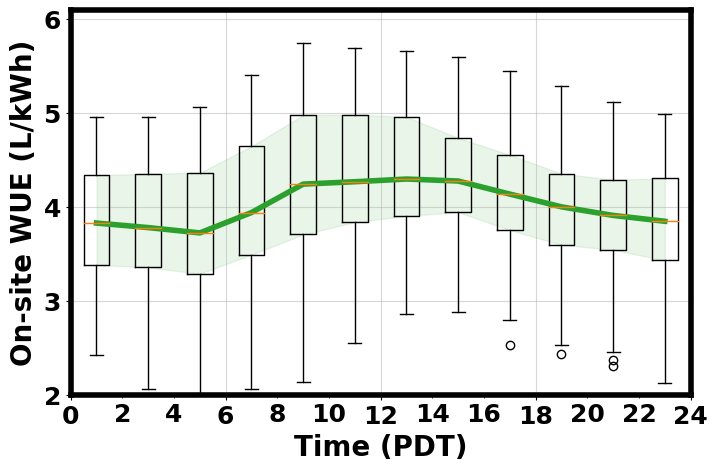

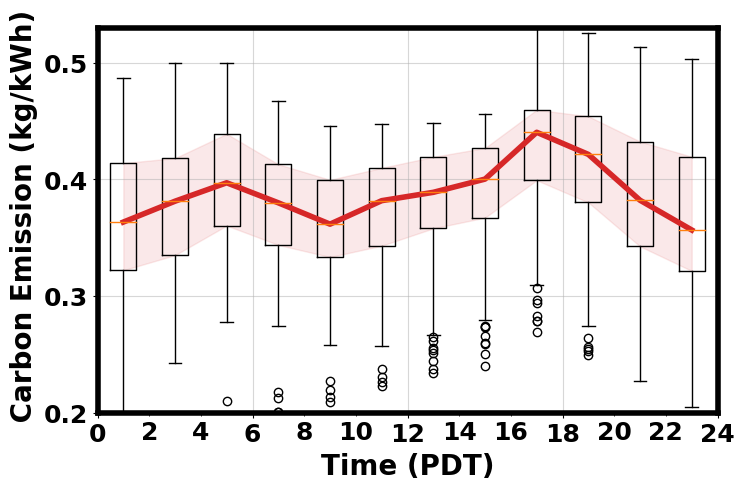

In [9]:
# 4S2_Oregan_NW.csv    HND_Nevada_CAL.csv   JYO_virginia_PJM.csv
# FTY_Georgia_SE.csv   JWY_Texas_ERCO.csv

loc_name      = "JWY_Texas_ERCO"
fuel_mix_path = "data/fuelmix/{}_year_2022.csv".format(loc_name.split("_")[-1])
weather_path  = "data/weather/{}.csv".format(loc_name)
dc_loc        = loc_name.split("_")[1]


work_time     = 1
start_str     = "2022-09-01T01"
end_date_str  = "2022-10-30T01"
start_ts      = convert_to_str_days(start_str)*24  
end_ts        = convert_to_str_days(end_date_str)*24  + work_time - 1
num_timeslot  = end_ts - start_ts

time_array    = np.arange(1, 1+num_timeslot)/24

# Suppose the datacenter PUE is ~1.2
indirectWue = load_indirect_WUE(fuel_mix_path, dc_loc) * 1.1
indirectWue = np.roll(indirectWue, -7)      # UTC to PDT time
indirectWue = indirectWue[start_ts:end_ts]

carbon_curve = load_carbon(fuel_mix_path, dc_loc)
carbon_curve = np.roll(carbon_curve, -7)    # UTC to PDT time
carbon_curve = carbon_curve[start_ts:end_ts]
 

directWue = load_direct_WUE(weather_path)
directWue = np.roll(directWue, -7)
directWue = directWue[start_ts:end_ts]



vis_boxplot(indirectWue + directWue, work_time, "Total WUE (L/kWh)", fill_color = "tab:blue",
            ylim = [3,7], yticks = np.arange(3,7.1,1), 
            save_path = "output/boxplot_more/{}_total_wue_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

vis_boxplot(directWue, work_time, "On-site WUE (L/kWh)", fill_color = "tab:green",
            ylim = [2,6.1], yticks = np.arange(2,6.1,1), 
            save_path = "output/boxplot_more/{}_direct_wue_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

vis_boxplot(carbon_curve, work_time, " Carbon Emission (kg/kWh)", 
            ylim = [0.2,0.53],yticks = np.arange(0.2, 0.51, 0.1),fill_color = "tab:red",
            save_path = "output/boxplot_more/{}_cer_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

### 2.4 Oregan

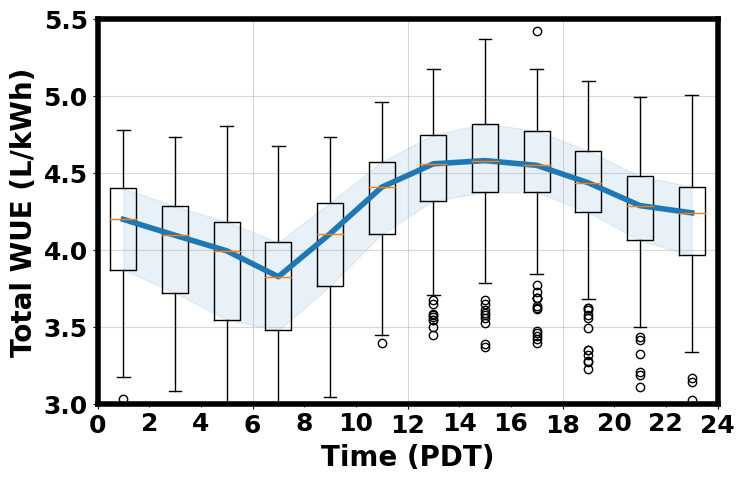

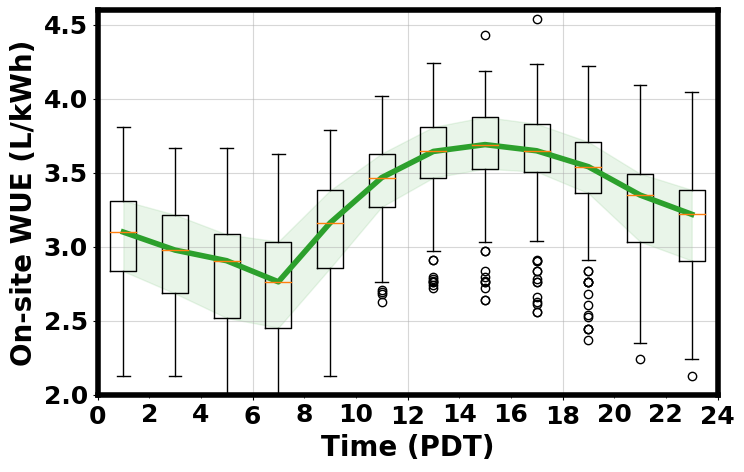

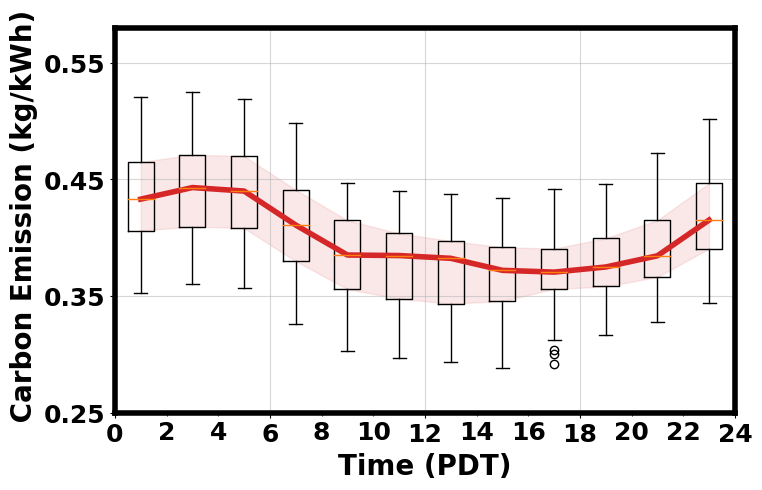

In [10]:
# 4S2_Oregan_NW.csv    HND_Nevada_CAL.csv   JYO_virginia_PJM.csv
# FTY_Georgia_SE.csv   JWY_Texas_ERCO.csv

loc_name      = "4S2_Oregan_NW"
fuel_mix_path = "data/fuelmix/{}_year_2022.csv".format(loc_name.split("_")[-1])
weather_path  = "data/weather/{}.csv".format(loc_name)
dc_loc        = loc_name.split("_")[1]


work_time     = 1
start_str     = "2022-09-01T01"
end_date_str  = "2022-10-30T01"
start_ts      = convert_to_str_days(start_str)*24  
end_ts        = convert_to_str_days(end_date_str)*24  + work_time - 1
num_timeslot  = end_ts - start_ts

time_array    = np.arange(1, 1+num_timeslot)/24

# Suppose the datacenter PUE is ~1.2
indirectWue = load_indirect_WUE(fuel_mix_path, dc_loc) * 1.1
indirectWue = np.roll(indirectWue, -7)      # UTC to PDT time
indirectWue = indirectWue[start_ts:end_ts]

carbon_curve = load_carbon(fuel_mix_path, dc_loc)
carbon_curve = np.roll(carbon_curve, -7)    # UTC to PDT time
carbon_curve = carbon_curve[start_ts:end_ts]
 

directWue = load_direct_WUE(weather_path)
directWue = np.roll(directWue, -7)
directWue = directWue[start_ts:end_ts]



vis_boxplot(indirectWue + directWue, work_time, "Total WUE (L/kWh)", fill_color = "tab:blue",
            ylim = [3,5.5], yticks = np.arange(3,5.6,0.5), 
            save_path = "output/boxplot_more/{}_total_wue_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

vis_boxplot(directWue, work_time, "On-site WUE (L/kWh)", fill_color = "tab:green",
            ylim = [2,4.6], yticks = np.arange(2,4.6,0.5), 
            save_path = "output/boxplot_more/{}_direct_wue_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))

vis_boxplot(carbon_curve, work_time, " Carbon Emission (kg/kWh)", 
            ylim = [0.25,0.58],yticks = np.arange(0.25, 0.58, 0.1),fill_color = "tab:red",
            save_path = "output/boxplot_more/{}_cer_{}_to_{}.pdf".format(dc_loc, start_str[5:10], end_date_str[5:10]))